# Fine-tuning Bert model (model creation) 3

### Imports

In [1]:
import pandas as pd
import sys
import os

# Get the current working directory (typically where the notebook is located or executed)
current_dir = os.getcwd()

# Define the project root relative to the current working directory
project_root = os.path.abspath(os.path.join(current_dir, "../"))  # Adjust this based on your folder structure

# Add project_root to sys.path
sys.path.append(project_root)

from src.models.fine_tune import BERTSentimentAnalysisStrategy, ABSAContext
from src.models.fine_tune_evaluation import EvaluationContext, TrainingCurvesStrategy, MetricsStrategy, ConfusionMatrixStrategy, ROCAUCStrategy, TSNEStrategy

c:\Users\Geeneth\Desktop\Code\Machine Learning\PycharmProjects\Advanced Sentiment Analysis\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Loading the data

In [2]:
data_path_fine_tune_model = '../data/external/Restaurants_Train_v2.csv'
fine_tune_dataset = pd.read_csv(data_path_fine_tune_model)

In [3]:
fine_tune_dataset

,id,Sentence,Aspect Term,polarity,from,to
0,3121,But the staff was so horrible to us.,staff,negative,8,13
1,2777,"To be completely fair, the only redeeming fact...",food,positive,57,61
2,1634,"The food is uniformly exceptional, with a very...",food,positive,4,8
3,1634,"The food is uniformly exceptional, with a very...",kitchen,positive,55,62
4,1634,"The food is uniformly exceptional, with a very...",menu,neutral,141,145
...,...,...,...,...,...,...
3688,671,Each table has a pot of boiling water sunken i...,pot of boiling water,neutral,17,37
3689,671,Each table has a pot of boiling water sunken i...,meats,neutral,99,104
3690,671,Each table has a pot of boiling water sunken i...,vegetables,neutral,114,124
3691,671,Each table has a pot of boiling water sunken i...,rice,neutral,130,134


In [4]:
fine_tune_dataset.rename(columns={"Aspect Term": "Aspect", "polarity": "Sentiment"}, inplace=True)

In [5]:
ftd = fine_tune_dataset.drop(["id", "from", "to"], axis=1)

### Spliting the pre-training dataset

In [6]:
train_data = ftd.sample(frac=0.8, random_state=123)
val_data = ftd.drop(train_data.index)

In [7]:
absa_strategy = BERTSentimentAnalysisStrategy()
context = ABSAContext(absa_strategy)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Training the model

In [8]:
context.train_model(train_data, val_data)

c:\Users\Geeneth\Desktop\Code\Machine Learning\PycharmProjects\Advanced Sentiment Analysis\.venv\lib\site-packages\transformers\training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.018100,0.742171,0.721245,0.754587,0.721245,0.691708
2,0.705900,0.666925,0.742896,0.762061,0.742896,0.722814
3,0.575500,0.596547,0.779432,0.789640,0.779432,0.775170
4,0.351400,0.556328,0.813261,0.816576,0.813261,0.813653


2025/03/08 08:30:23 WARNING mlflow.transformers: The model card could not be retrieved from the hub due to [Errno 13] Permission denied: 'c:\\Users\\Geeneth\\Desktop\\Code\\Machine Learning\\PycharmProjects\\Advanced Sentiment Analysis\\models\\saved_models'
2025/03/08 08:30:23 WARNING mlflow.transformers: Unable to find license information for this model. Please verify permissible usage for the model you are storing prior to use.
2025/03/08 08:30:26 WARNING mlflow.utils.requirements_utils: Found torch version (2.6.0+cu126) contains a local version label (+cu126). MLflow logged a pip requirement for this package as 'torch==2.6.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2025/03/08 08:30:26 WARNING mlflow.utils.requirements_utils: Found torchvision version (0.21.0+cu126) contains a local version label (+cu126). MLflow logged a pip requirement for this packa

✅ Model saved at c:\Users\Geeneth\Desktop\Code\Machine Learning\PycharmProjects\Advanced Sentiment Analysis\models\saved_models
🏃 View run brawny-wren-858 at: http://127.0.0.1:5000/#/experiments/1/runs/ae48e06337864440ba48b996dd4ae06c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


### Evaluation metrics

In [9]:

evaluation = EvaluationContext(TrainingCurvesStrategy())

Loss and Accuracy Curves


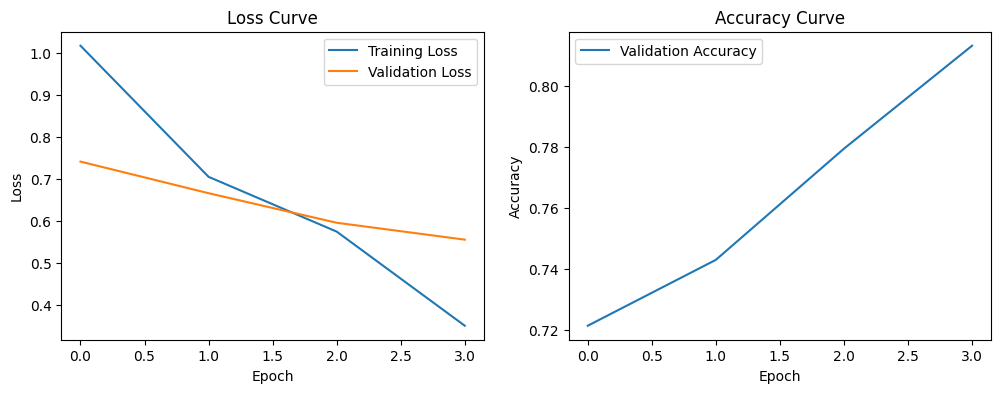

In [10]:
print("Loss and Accuracy Curves")
evaluation.set_strategy(TrainingCurvesStrategy())
evaluation.execute_evaluation(absa_strategy.trainer, absa_strategy.val_dataset)

In [11]:
print("Metrics values")
evaluation.set_strategy(MetricsStrategy())
evaluation.execute_evaluation(absa_strategy.trainer, absa_strategy.val_dataset)

Metrics values


Precision: 0.8166
Recall: 0.8133
F1-Score: 0.8137


Confusion Matrix for all labels


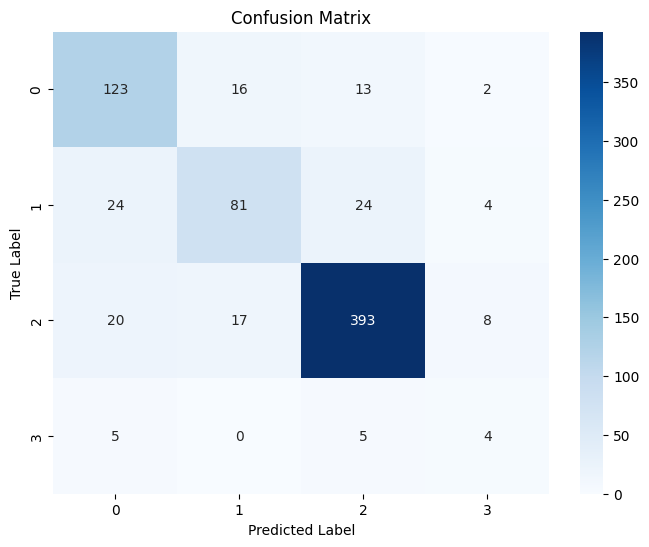

In [12]:
print("Confusion Matrix for all labels")
evaluation.set_strategy(ConfusionMatrixStrategy())
evaluation.execute_evaluation(absa_strategy.trainer, absa_strategy.val_dataset)

ROC AUC Curve


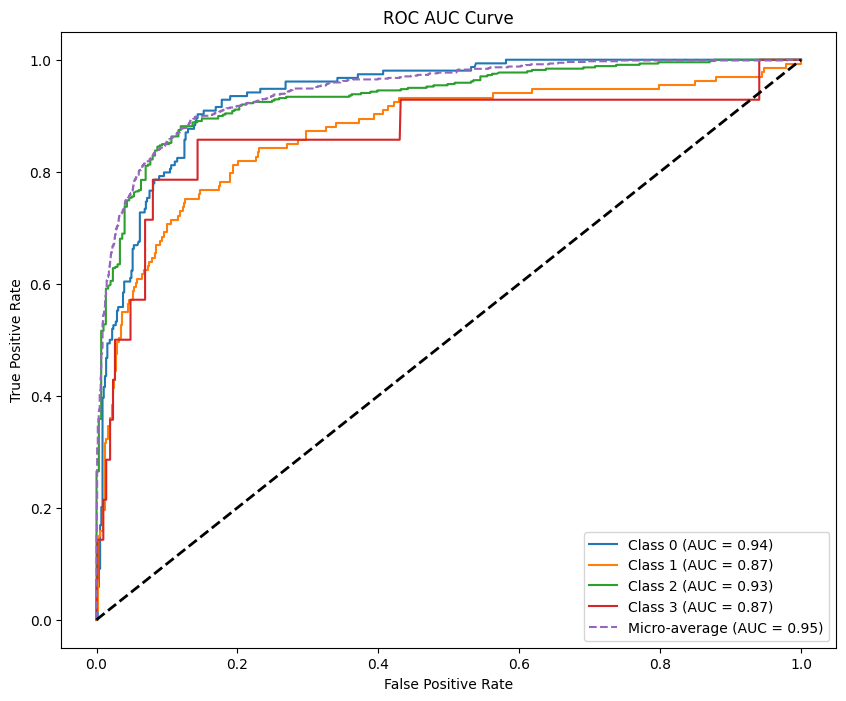

In [13]:
print("ROC AUC Curve")
evaluation.set_strategy(ROCAUCStrategy())
evaluation.execute_evaluation(absa_strategy.trainer, absa_strategy.val_dataset)

t-SNE Visualization


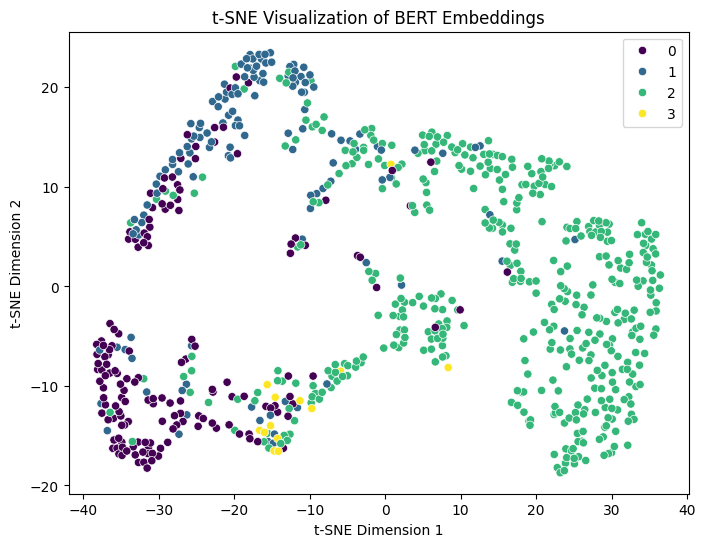

In [14]:
print("t-SNE Visualization")
evaluation.set_strategy(TSNEStrategy())
evaluation.execute_evaluation(absa_strategy.trainer, absa_strategy.val_dataset)